In [1]:
using Distributions,Random,Statistics,Plots,QuadGK,LinearAlgebra,Latexify,LaTeXStrings,SpecialFunctions,BenchmarkTools

# Normal-Inverse Gaussian Distribution
The normal-inverse Gaussian distribution (NIG) has four parameters, $\lambda$ (location),
$\delta$ (scale), 
$\alpha $ (tail heaviness), and 
$\beta$ (asymmetry),  and its density is given by
$$
f(x)=\frac{\alpha \delta K_1 \left( \alpha \sqrt{\delta^2 + (x - \lambda)^2} \right)}{\pi \sqrt{\delta^2 + (x - \lambda)^2}} e^{\delta \gamma + \beta (x - \lambda)},
$$
where $K_1(\cdot)$ denotes the modified Bessel function of the second kind, and $\gamma = \sqrt{\alpha^2 - \beta^2}$ is a (redundant) auxiliary parameter that simplifies expressions.

The Moment-Generating Function (MGF) is given by
$$
\operatorname{MGF}(z)=e^{\lambda z + \delta \left( \gamma - \sqrt{\alpha^2 - (\beta + z)^2} \right)}.
$$
## Standardized NIG

The standardized NIG distribution has mean zero and variance one, which is acheived with
$$
\delta = \frac{\gamma^3}{\alpha^2} \quad \text{and} \quad \lambda = - \frac{\delta \beta}{\gamma}
$$
The standardized distribution can be characterized by two parameters $(\xi,\chi)$, $$
\xi = \frac{1}{\sqrt{1 + \delta \gamma}} \quad \text{and} \quad \chi = \xi \frac{\beta}{\alpha}.
$$
with domain $ 0\leq |\chi| \leq \xi <1. $


The corresponding NIG parameters are given by
$$
\lambda = - \nu\varrho\quad 
\delta = \nu\sqrt{1-\varrho^2}\quad 
\alpha = \frac{\nu}{1-\varrho^2}\quad 
\beta = \frac{\varrho\nu}{1-\varrho^2}\quad 
\gamma = \frac{\nu}{\sqrt{1-\varrho^2}}.
%\lambda = - \chi\frac{\sqrt{1-\xi^2}}{\xi^2}\quad 
%\delta = \sqrt{\xi^2-\chi^2}\frac{\sqrt{1-\xi^2}}{\xi^2}\quad 
%\alpha = \frac{\xi \sqrt{1 - \xi^2}}{\xi^2 - \chi^2}\quad 
%\beta = \frac{\chi \sqrt{1 - \xi^2}}{\xi^2 - \chi^2}\quad 
%\gamma = \sqrt{\frac{1 - \xi^2}{\xi^2 - \chi^2}},
$$ 
where $\nu=\sqrt\frac{1-\xi^2}{\xi^2}$ and $\varrho=\chi/\xi$ is an alternative parametrization, $\varrho\in (-1,1)$ and $\nu\in \mathbb{R}$.

In [3]:
# Parameters for standardized NIG (has mean zero and variance 1)
# Characterized by (ξ,χ),  0 ≤ |χ| < ξ < 1
function sNIG(ξ,χ)
    ν  =  √(1-ξ^2)/ξ; ϱ  =  χ/ξ  # auxiliary parameters for simpler expressions
    λ  = -ν*ϱ; δ = ν*√(1-ϱ^2); α = ν/(1-ϱ^2); β = ν*ϱ/(1-ϱ^2); γ = ν/√(1-ϱ^2)
    # α = ξ*√(1-ξ^2)/(ξ^2-χ^2); β = χ*√(1-ξ^2)/(ξ^2-χ^2); γ = √((1-ξ^2)/(ξ^2-χ^2)); δ = γ^3/α^2; λ = - δ*β/γ
    return(λ, α, β, δ, γ)
end
# Moment-Generating Function for NIG
function MGF_NIG(λ, α, β, δ, γ, z)
    return exp(λ*z + δ*(γ-√(α^2 - (β+z)^2)))
end
# Density of NIG
function pdf_NIG(λ, α, β, δ, γ, t)
    return α*δ*besselk(1,α*√(δ^2+(t-λ)^2))/(π*√(δ^2+(t-λ)^2))*exp(δ*γ+β*(t-λ))
end

pdf_NIG (generic function with 1 method)

In [274]:
ξ = 1/2
χ = -1/3
λ, α, β, δ, γ = sNIG(ξ, χ)
δ,√(ξ^2-χ^2)*√(1-ξ^2)/ξ^2
sNIG(ξ, χ)

(1.1547005383792515, 3.1176914536239786, -2.0784609690826525, 1.2909944487358056, 2.32379000772445)

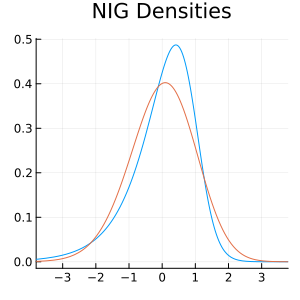

In [600]:
# NIG distribution I
λ, α, β, δ, γ = sNIG(1/2, -1/3)

plot(x->pdf(NormalInverseGaussian(λ, α, β, δ),x),xlims=(-3.8,3.8),
    size=(300,300),
    legend=:none,
    title = "NIG Densities",
    label=L"(\xi,\chi)=(1/2,-1/3)")

# NIG distribution II
λ, α, β, δ, γ = sNIG(1/8, -1/16)

p01 = plot!(x->pdf(NormalInverseGaussian(λ, α, β, δ),x),
    label=L"(\xi,\chi)=(1/8,-1/16)")

## New Methods for Computing Absolute Moments

In [260]:
# New Integral Expression for Evaluating Real Absolute Moments
# Theorem 1
function CMGF_NIG(s, λ, α, β, δ, γ, r)
    g(t) = real((MGF_NIG(λ, α, β, δ, γ, s+im*t)+ MGF_NIG(λ, α, β, δ, γ, -s-im*t))/(s+im*t)^(r+1))
    integral, err = quadgk(t -> g(t), 0, Inf, rtol=1e-8)
    return gamma(r+1)*integral/π
end
# New Integral Expression for Evaluating INTEGER Moments
# Theorem 3
function CMGF3_NIG(s, λ, α, β, δ, γ, k)
    g(t) = real((MGF_NIG(λ, α, β, δ, γ, s+im*t)+(-1)^k *MGF_NIG(λ, α, β, δ, γ, -s-im*t))/(s+im*t)^(k+1))
    integral, err = quadgk(t -> g(t), 0, Inf, rtol=1e-8)
    return factorial(k)*integral/π
end

CMGF3_NIG (generic function with 1 method)

## Integrate with Density

In [169]:
# Direct integration of |x|^r*f(x)
function mPDF_NIG(λ, α, β, δ, γ, r)
    f(x) = pdf_NIG(λ, α, β, δ, γ, x)*abs(x).^r #* 
    integral, err = quadgk(x -> f(x), -25.0, 100, rtol=1e-8)        # A bit unstable and endpoint (Inf does not work)
    return integral
end

mPDF_NIG (generic function with 1 method)

## Simulation Method: Average of N draws

In [172]:
# This is the function for simulating moments
# r: Estimates the r'th absolute momemnt
# N: Number of random variables to average over
function MomentSimNIG(λ, α, β, δ, γ, r, N)
    NIGdist = NormalInverseGaussian(λ, α, β, δ)
    X       = [abs(rand(NIGdist)) for _ in 1:N].^r
    return mean(X)
end
# Function to assess the precision of simulation based moments
function MomentStdDevSimNIG(λ, α, β, δ, γ, r, N)
    μᵣ      = CMGF_NIG(1,λ, α, β, δ, γ, r)
    NIGdist = NormalInverseGaussian(λ, α, β, δ)
    X       = [abs(rand(NIGdist)) for _ in 1:N].^r
    return stdm(X,μᵣ,corrected=false)/√N
end

MomentStdDevSimNIG (generic function with 1 method)

### Two moments we know the value of: r=2 and r=4

In [256]:
# Second Moment 
r = 2 
λ, α, β, δ, γ = sNIG(1/2, -1/3)
N  = 1000000
M2 = MomentSimNIG(λ, α, β, δ, γ, r, N)
print("True 2nd moment  $(δ*α^2/γ^3) \n")
print("CMGF1 method     $(CMGF_NIG(1,λ, α, β, δ, γ, r)) \n")
print("CMGF3 method     $(CMGF3_NIG(1,λ, α, β, δ, γ, r)) \n")
print("DensityIntegral  $(mPDF_NIG(λ, α, β, δ, γ, r)) \n")
print("Simulated moment $(M2)        ($(N) simulations) \n")
print("Std. deviation   $(MomentStdDevSimNIG(λ, α, β, δ, γ, r, N)) \n")

True 2nd moment  0.9999999999999996 
CMGF1 method     1.000000000000106 
CMGF3 method     1.0000000000001616 
DensityIntegral  0.9999999998803956 
Simulated moment 1.0008604267948684        (1000000 simulations) 
Std. deviation   0.002165941991818379 


In [262]:
# Fourth Moment 
r = 4
λ, α, β, δ, γ = sNIG(1/2, -1/3)
N  = 1000000
M4 = MomentSimNIG(λ, α, β, δ, γ, r, N)
print("True 4th moment  $(3+3*(1+4*β^2/α^2)/(δ*γ)) \n")
print("CMGF1 method     $(CMGF_NIG(1,λ, α, β, δ, γ, r)) \n")
print("CMGF3 method     $(CMGF3_NIG(1,λ, α, β, δ, γ, r)) \n")  
print("DensityIntegral  $(mPDF_NIG(λ, α, β, δ, γ, r)) \n")
print("Simulated moment $(M4)        ($(N) simulations) \n")
print("Std. deviation   $(MomentStdDevSimNIG(λ, α, β, δ, γ, r, N)) \n")

True 4th moment  5.777777777777779 
CMGF1 method     5.777777777778293 
CMGF3 method     5.777777777778293 
DensityIntegral  5.777777696720498 
Simulated moment 5.778888127614942        (1000000 simulations) 
Std. deviation   0.0649205320185914 


## Speed Comparisons

In [161]:
λ, α, β, δ, γ = sNIG(1/2, -1/3)
#Simulated moment
@btime MomentSimNIG(λ, α, β, δ, γ,-0.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 0.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 1.0, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 1.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 2.0, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 2.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 3.0, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 3.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 4.0, N);

  411.320 ms (7 allocations: 152.59 MiB)
  415.781 ms (7 allocations: 152.59 MiB)
  307.985 ms (7 allocations: 152.59 MiB)
  413.294 ms (7 allocations: 152.59 MiB)
  311.857 ms (7 allocations: 152.59 MiB)
  414.841 ms (7 allocations: 152.59 MiB)
  303.453 ms (7 allocations: 152.59 MiB)
  420.549 ms (7 allocations: 152.59 MiB)
  334.354 ms (7 allocations: 152.59 MiB)


In [162]:
# CMGF
@btime CMGF_NIG(1,λ, α, β, δ, γ,-0.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 0.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 1.0)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 1.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 2.0)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 2.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 3.0)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 3.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 4.0);

  28.375 μs (4 allocations: 400 bytes)
  29.209 μs (4 allocations: 400 bytes)
  20.333 μs (4 allocations: 400 bytes)
  29.375 μs (4 allocations: 400 bytes)
  20.458 μs (4 allocations: 400 bytes)
  24.500 μs (4 allocations: 400 bytes)
  17.083 μs (4 allocations: 400 bytes)
  24.500 μs (4 allocations: 400 bytes)
  17.667 μs (4 allocations: 400 bytes)


In [272]:
# CMGF Integer Moments
@btime CMGF3_NIG(1,λ, α, β, δ, γ, 2)
@btime CMGF3_NIG(1,λ, α, β, δ, γ, 1)
@btime CMGF3_NIG(1,λ, α, β, δ, γ, 3)
@btime CMGF3_NIG(1,λ, α, β, δ, γ, 4);

  20.666 μs (4 allocations: 400 bytes)
  1.018 s (25 allocations: 33.70 MiB)
  17.375 μs (4 allocations: 400 bytes)
  17.667 μs (4 allocations: 400 bytes)


In [164]:
# PDF... Integrate x^r*f(x)
@btime mPDF_NIG(λ, α, β, δ,γ,-0.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 0.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 1.0)
@btime mPDF_NIG(λ, α, β, δ,γ, 1.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 2.0)
@btime mPDF_NIG(λ, α, β, δ,γ, 2.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 3.0)
@btime mPDF_NIG(λ, α, β, δ,γ, 3.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 4.0);

  713.208 μs (1948 allocations: 37.70 KiB)
  244.083 μs (716 allocations: 12.95 KiB)
  198.625 μs (626 allocations: 11.55 KiB)
  175.166 μs (536 allocations: 10.14 KiB)
  108.417 μs (386 allocations: 7.80 KiB)
  149.250 μs (476 allocations: 9.20 KiB)
  122.041 μs (416 allocations: 8.27 KiB)
  114.792 μs (386 allocations: 7.80 KiB)
  100.166 μs (356 allocations: 7.33 KiB)


In [21]:
λ, α, β, δ, γ = sNIG(1/8, -1/16)
#Simulated moment
@btime MomentSimNIG(λ, α, β, δ, γ,-0.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 0.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 1.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 2.5, N)
@btime MomentSimNIG(λ, α, β, δ, γ, 3.5, N);
# CMGF
@btime CMGF_NIG(1,λ, α, β, δ, γ,-0.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 0.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 1.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 2.5)
@btime CMGF_NIG(1,λ, α, β, δ, γ, 3.5);
# PDF... Integrate x^r*f(x)
@btime mPDF_NIG(λ, α, β, δ,γ,-0.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 0.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 1.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 2.5)
@btime mPDF_NIG(λ, α, β, δ,γ, 3.5);

  42.439 ms (7 allocations: 15.26 MiB)
  42.269 ms (7 allocations: 15.26 MiB)
  42.305 ms (7 allocations: 15.26 MiB)
  42.273 ms (7 allocations: 15.26 MiB)
  42.330 ms (7 allocations: 15.26 MiB)
  32.583 μs (4 allocations: 400 bytes)
  20.750 μs (4 allocations: 400 bytes)
  20.958 μs (4 allocations: 400 bytes)
  27.708 μs (4 allocations: 400 bytes)
  28.500 μs (4 allocations: 400 bytes)
  375.959 μs (1948 allocations: 37.70 KiB)
  143.541 μs (746 allocations: 13.42 KiB)
  108.875 μs (566 allocations: 10.61 KiB)
  91.542 μs (476 allocations: 9.20 KiB)
  80.125 μs (416 allocations: 8.27 KiB)


## Figures for Paper

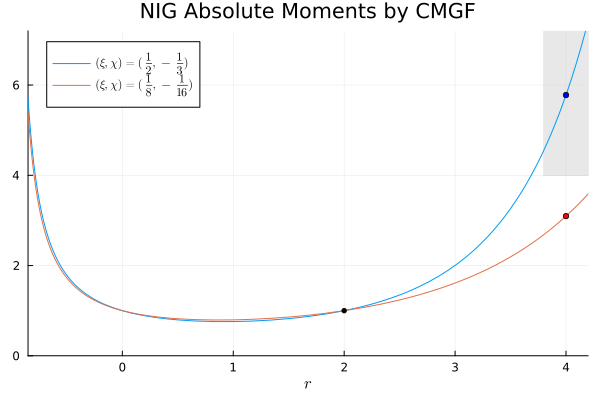

In [591]:
λ, α, β, δ, γ = sNIG(1/2, -1/3)

plot(xlims=(-0.85,4.2),ylims=(0.0,7.2),legend=:top,
    title="NIG Absolute Moments by CMGF"
)
# Define the corners of the shaded box
x_box = [3.8, 3.8, 4.2, 4.2]  # x coordinates of the rectangle
y_box = [4.0, 7.5, 7.5, 4.0]  # y coordinates of the rectangle
# Add a shaded box to the plot
plot!(x_box, y_box, fillalpha=0.5, color=:lightgray, seriestype=:shape, label=:none, linewidth=0)

plot!(r->CMGF_NIG(1,λ, α, β, δ, γ,r),
    label=L"(\xi,\chi)=(\frac{1}{2},-\frac{1}{3})",
    seriescolor=1,
    xlabel=L"r")
M4a = 3 + 3*(1+4*β^2/α^2)/(δ*γ)
scatter!([4], [M4a], color=:blue,markersize=3, marker=:circle,  label=:none)

λ, α, β, δ, γ = sNIG(1/8, -1/16)
plot!(r->CMGF_NIG(1,λ, α, β, δ, γ,r),seriescolor=2,
    label=L"(\xi,\chi)=(\frac{1}{8},-\frac{1}{16})")

scatter!([2], [1], color=:transparent,markersize=3, marker=:circle,  label=:none)

M4b = 3 + 3*(1+4*β^2/α^2)/(δ*γ)
scatter!([4], [M4b], color=:red,markersize=3, marker=:circle,  label=:none)
p1 = plot!(legend=:topleft,size=(600,400))

In [593]:
savefig("NIGmoments1.pdf")

"/Users/prhansen/My Drive/Academic/Software/JuliaCode/MomentMGF/NIGmoments1.pdf"

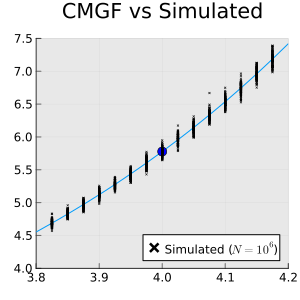

In [595]:
# A plot with simulation-based estimates included
λ, α, β, δ, γ = sNIG(1/2, -1/3)
plot(xlims=(3.8,4.2),ylims=(4.0,7.5),
    legend=:bottomright,
    fmt=:pdf,
    size=(300,300))

# Add a shaded box to the plot
x_box = [3.8, 3.8, 4.2, 4.2]  # x coordinates of the rectangle
y_box = [4.0, 7.5, 7.5, 4.0]  # y coordinates of the rectangle
plot!(x_box, y_box, fillalpha=0.5, color=:lightgray, seriestype=:shape, label=:none, linewidth=0)

plot!(r->CMGF_NIG(1,λ, α, β, δ, γ,r),
    title="CMGF vs Simulated",
    label=:none,#L"(\xi,\chi)=(\frac{1}{2},-\frac{1}{3})",
    seriescolor=1)

# Fourth moment 
M4a = 3 + 3*(1+4*β^2/α^2)/(δ*γ)  
scatter!([4], [M4a], color=:blue,markersize=5, marker=:circle, linewidth=0, label=:none)

# 100 Simulation-based estimates 
N = 1000000
r_values = Float64[]  # Collect all r values
y_values = Float64[]  # Collect corresponding y value
for r in 3.825:0.025:4.175
    for j in 1:100
        y = MomentSimNIG(λ, α, β, δ, γ, r, N)
        push!(r_values, r)  # Add the r value
        push!(y_values, y)  # Add the corresponding y value
    end
end
p22 = scatter!(r_values, y_values, color=:black, markersize=1, marker=:x, label=L"Simulated ($N=10^6$)")    

### How many decimal point are accurate?

In [506]:
λ, α, β, δ, γ = sNIG(1/2, -1/3)
K = 100
N = K*1000000                         # simulate K x 1mill for extra accuracy
rvector = 0.50:0.025:4.2
m = size(rvector)[1]
rStdDev1 = zeros(m)
rmoment1 = zeros(m)
for j = 1:m
    r = rvector[j]
    rStdDev1[j] = MomentStdDevSimNIG(λ, α, β, δ, γ, r, N)     # StdDev of simulation method
    rmoment1[j] = CMGF_NIG(1, λ, α, β, δ, γ, r)
end
λ, α, β, δ, γ = sNIG(1/8, -1/16)
rStdDev2 = zeros(m)
rmoment2 = zeros(m)
for j = 1:m
    r = rvector[j]
    rStdDev2[j] = MomentStdDevSimNIG(λ, α, β, δ, γ, r, N)
    rmoment2[j] = CMGF_NIG(1, λ, α, β, δ, γ, r)
end
rStdDev1 = rStdDev1.*√K           # rescale by √K to get accuracty for N=1mill 
rStdDev2 = rStdDev2.*√K

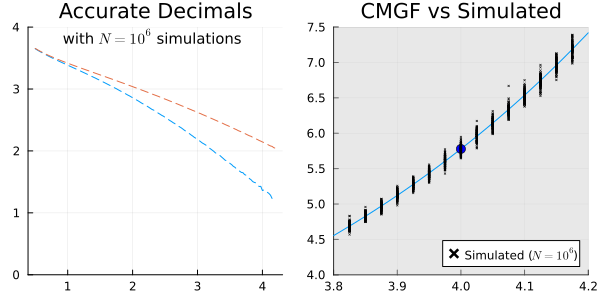

In [598]:
plot(ylims=(0,4),
    title="Accurate Decimals",legend=:none,
    size=(300,300))

decimals1 = -log10.(2.0 .*  rStdDev1)
plot!(rvector,decimals1, linestyle=:dash,seriescolor=1,label=:none)
decimals2 = -log10.(2.0 .*  rStdDev2)
plot!(rvector,decimals2, linestyle=:dash, seriescolor=2,label=:none)
annotate!(2.3, 3.85, text(L"with $N=10^6$ simulations", :black, 10))
p21 = plot!()
plot(p21,p22, layout=(1,2),size=(600,300),fmt=:pdf)

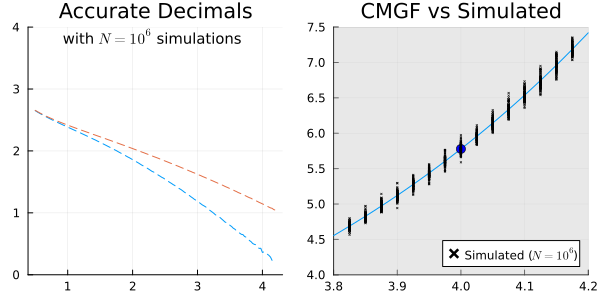

In [585]:
savefig("NIGmoments2.pdf")

"/Users/prhansen/My Drive/Academic/Software/JuliaCode/MomentMGF/NIGmoments1.pdf"

## Why is it fast?

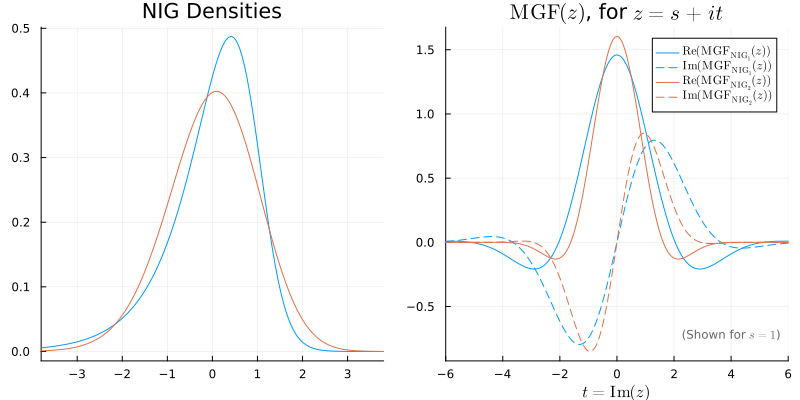

In [606]:
# MGF relevant for integration (over the line in C it is integrated over). 
# z = 1 + i*t      (s=1)
# NIG distribution I
λ, α, β, δ, γ = sNIG(1/2, -1/3)
plot(xlims=(-6,6),xlabel=L"t=\mathrm{Im}(z)",title=L"$\mathrm{MGF}(z)$, for $z=s+it$")
plot!(t->real(MGF_NIG(λ, α, β, δ, γ, 1+im*t)),label=L"\mathrm{Re}(\mathrm{MGF}_{\mathrm{NIG}_1}(z))")
plot!(t->imag(MGF_NIG(λ, α, β, δ, γ, 1+im*t)),label=L"\mathrm{Im}(\mathrm{MGF}_{\mathrm{NIG}_1}(z))",linestyle=:dash,seriescolor=1)
# NIG distribution II
λ, α, β, δ, γ = sNIG(1/8, -1/16)
plot!(t->real(MGF_NIG(λ, α, β, δ, γ, 1+im*t)),label=L"\mathrm{Re}(\mathrm{MGF}_{\mathrm{NIG}_2}(z))",seriescolor=2)
plot!(t->imag(MGF_NIG(λ, α, β, δ, γ, 1+im*t)),label=L"\mathrm{Im}(\mathrm{MGF}_{\mathrm{NIG}_2}(z))",linestyle=:dash,seriescolor=2)
annotate!(4, -0.72, text(L"(Shown for $s=1$)", color=RGB(0.4, 0.4, 0.4), 8))
p02 = plot!(size=(400,400))
plot(p01,p02, layout=(1,2),size=(800,400),fmt=:pdf)

In [608]:
savefig("NIG_dens_cMGF.pdf")

"/Users/prhansen/My Drive/Academic/Software/JuliaCode/MomentMGF/NIG_dens_cMGF.pdf"

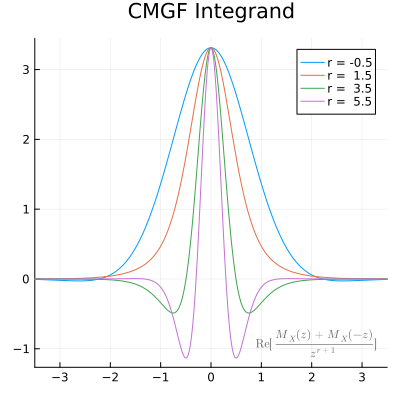

In [610]:
h(t,r) = real((MGF_NIG(λ, α, β, δ, γ, 1+im*t)+ MGF_NIG(λ, α, β, δ, γ, -1-im*t))/(s+im*t)^(r+1))
plot(size=(400,400),xlims=(-3.5,3.5),title="CMGF Integrand")
r=-0.5; plot!(t->h(t,r),label="r = $(r)") 
#r=0.5; plot!(t->h(t,r),label="r=$(r)") 
r=1.5; plot!(t->h(t,r),label="r =  $(r)") 
#r=2.5; plot!(t->h(t,r),label="r=$(r)") 
r=3.5; plot!(t->h(t,r),label="r =  $(r)") 
r=5.5; plot!(t->h(t,r),label="r =  $(r)") 
annotate!(2.1, -0.92, text(L"\mathrm{Re}[\frac{M_X(z)+M_X(-z)}{z^{r+1}}]", color=RGB(0.4, 0.4, 0.4), 8))
p31 = plot!(size=(400,400))    

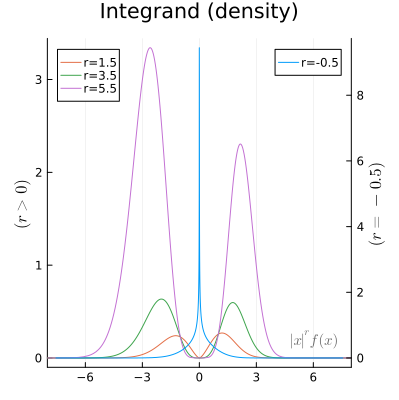

In [612]:
fxr(x,r) = pdf_NIG(λ, α, β, δ, γ, x) * abs(x)^r
plot(size=(400,400),xlims=(-8,8),legend=:topleft, ylabel=L"$(r>0)$",title="Integrand (density)")
#r =-0.5; plot!(x->fxr(x,r),label="r=$(r)") 
r = 1.5; plot!(x->fxr(x,r),label="r=$(r)", seriescolor=2) 
r = 3.5; plot!(x->fxr(x,r),label="r=$(r)", seriescolor=3) 
r = 5.5; plot!(x->fxr(x,r),label="r=$(r)", seriescolor=4) 
annotate!(6.1, 0.2, text(L"|x|^r f(x)", color=RGB(0.4, 0.4, 0.4), 10))

# Now plot for r = -0.5 using the secondary y-axis (twinx())
r = -0.5; plot!(twinx(), x -> fxr(x, r), label="r=$(r)", ylabel=L"$(r=-0.5)$", seriescolor=1,legend=:topright)
p32 = plot!(size=(400,400))

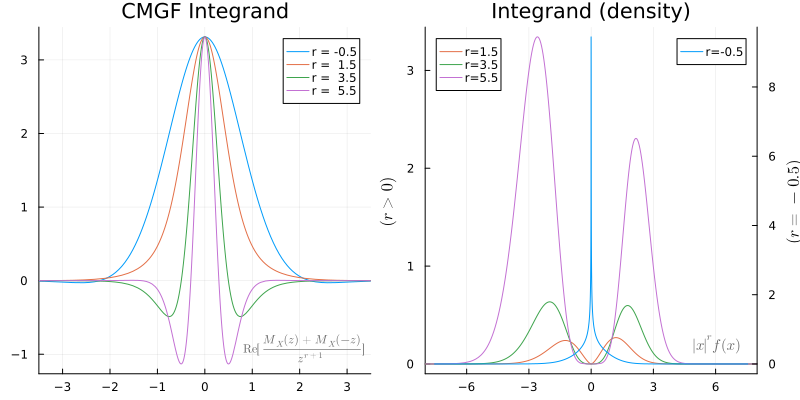

In [614]:
plot(p31,p32, layout=(1,2),size=(800,400),fmt=:pdf)

In [616]:
savefig("NIG_integrands.pdf")

"/Users/prhansen/My Drive/Academic/Software/JuliaCode/MomentMGF/NIG_integrands.pdf"